<center>

# <font center color="blue">Regresión y clasificación</font>

**Autor:**

_Yeferson Fabian Rubio Montero_

**Contenido:**

1. [Red neuronal de clasificación binaria para predecir el cáncer de seno](#Red_neuronal_de_clasificación_binaria_para_predecir_el_cáncer_de_seno)

2. [Red neuronal de regresión para predecir el precio de las viviendas en Boston](#Red_neuronal_de_regresión_para_predecir_el_precio_de_las_viviendas_en_Boston)


<a class="anchor" id="Red_neuronal_de_clasificación_binaria_para_predecir_el_cáncer_de_seno"></a>
<center>
    
 ### <font center color="brownlight">Red neuronal de clasificación binaria para predecir el cáncer de seno</font>
    


* Los conjuntos de datos de cáncer de mama están disponibles en el repositorio de aprendizaje automático UCI mantenido por la Universidad de California, Irvine.

* El conjunto de datos contiene 569 muestras de células tumorales malignas y benignas.

* Las dos primeras columnas del conjunto de datos almacenan los números de identificación únicos de las muestras y el diagnóstico correspondiente (M = maligno, B = benigno), respectivamente.

* Las columnas 3 a 32 contienen 30 características de valor real que se han calculado a partir de imágenes digitalizadas de los núcleos celulares, que se pueden utilizar para construir un modelo para predecir si un tumor es benigno o maligno.

  * 1 = Maligno (canceroso) - Presente (M)
  * 0 = Benigno (no canceroso) -Ausente (B)

**Se calculan diez características de valor real para cada núcleo celular:**

* Radio (media de las distancias desde el centro hasta los puntos del perímetro)
* Textura (desviación estándar de los valores de escala de grises)
* Perímetro
* Área
* Suavidad (variación local en longitudes de radio)
* Compacidad $\left(\frac{perímetro^2}{ área}\right)$
* Concavidad (gravedad de las porciones cóncavas del contorno)
* Puntos cóncavos (número de porciones cóncavas del contorno)
* Simetría
* Dimensión fractal ("aproximación de la línea costera" - 1)

La media, el error estándar y el "peor" o el más grande (la media de los tres valores más grandes) de estas características se calcularon para cada imagen, lo que dio como resultado 30 características. Por ejemplo, el campo 3 es Radio medio, el campo 13 es Radio SE, el campo 23 es Peor radio

In [3]:
import numpy as np #Álgebra lineal
import pandas as pd #Procesar datos

import matplotlib.pyplot as plt #Visualización
import seaborn as sns #Visualización

import warnings
warnings.filterwarnings("ignore") #Ignorar peligros 

#Construcción del modelo
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
!pip install xgboost
import xgboost as xgb

#Librerias para el modelo 
from __future__ import absolute_import, division, print_function, unicode_literals

#import csv
import tensorflow as tf

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Activation, Dropout
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from tensorflow.keras. metrics import FalseNegatives, FalsePositives, TrueNegatives
from tensorflow.keras. metrics import TruePositives, Precision, Recall
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import callbacks
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
print(tf.__version__)

2.4.1


In [13]:
# Loading the data
df = 'C:/Users/lilil/Downloads/data.csv'
training = pd.read_csv(df)
training

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

**Observación:**

Solo la columna 'diagnosis', que tenemos que predecir, es del tipo de datos de objeto.

Solo hay una columna de ID de tipo int. Probablemente lo dejemos de todos modos.

Hay un total de 31 columnas que son de tipo de datos flotantes.

In [15]:
df.drop(['Unnamed: 32','id'], axis = 1 , inplace=True)
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

**Observación:**
    
    Después de eliminar las dos columnas, ahora nos quedan 31 columnas. Veamos qué tan bien se correlacionan con la columna de diagnóstico.

In [16]:
df.diagnosis.replace({"M":1,"B":0},inplace=True)
df.diagnosis.unique()

array([1, 0], dtype=int64)

**Observación:**

Para realizar nuestro análisis fácilmente, hemos convertido la columna de destino como:

Maligno $->$ 1

Benigno $->$ 0

<AxesSubplot:>

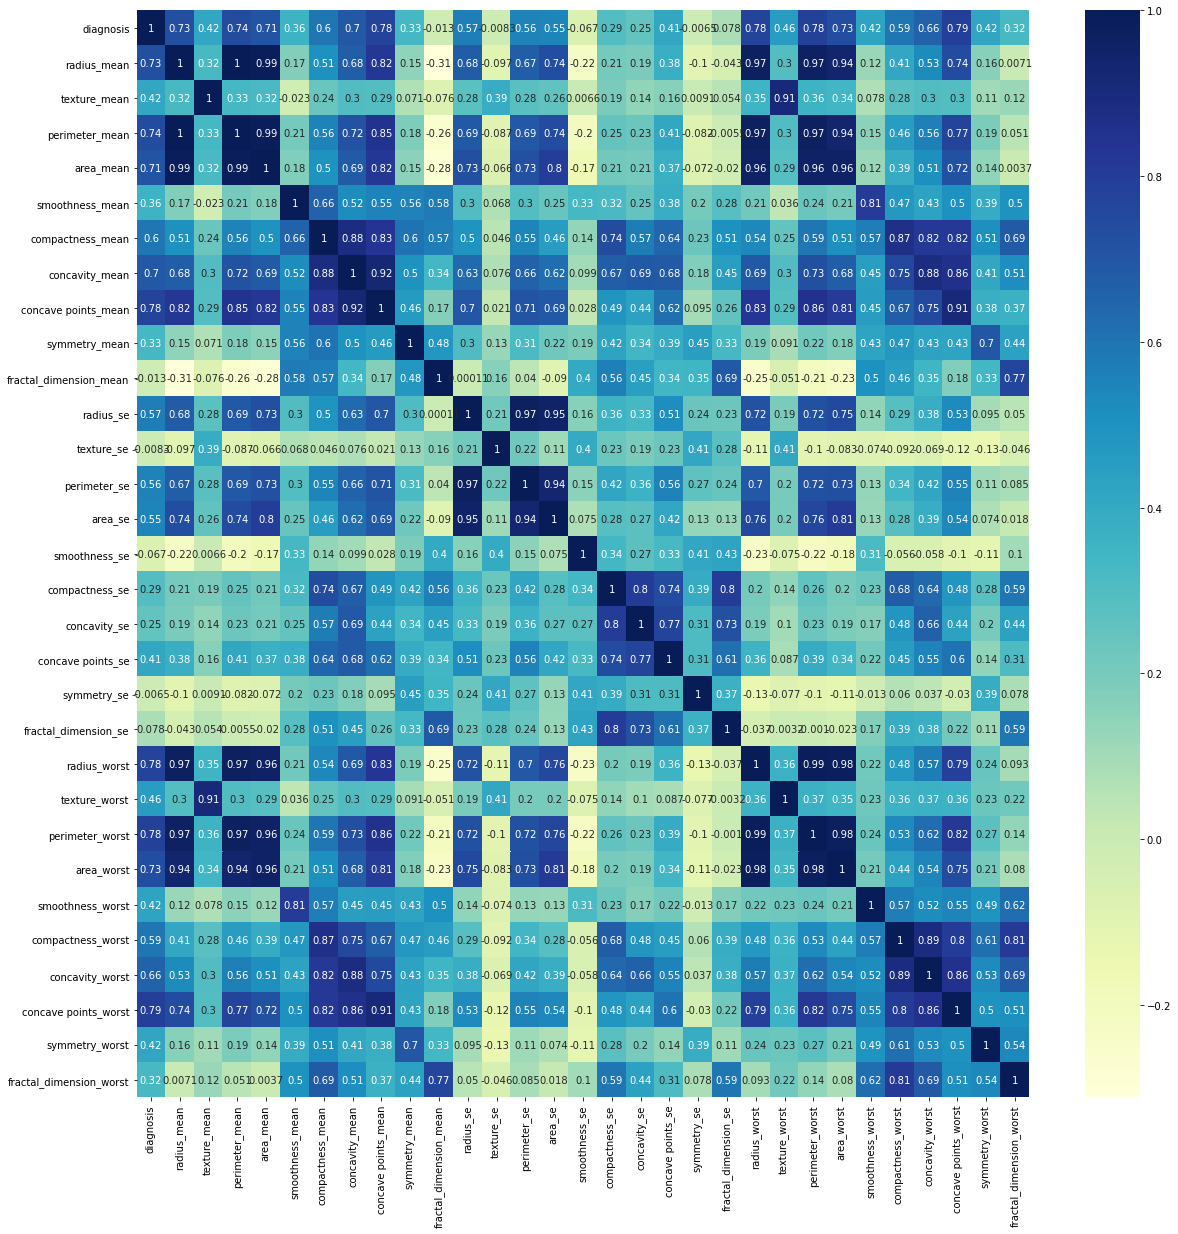

In [17]:
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), cmap='YlGnBu', annot = True)

**Procedimiento One-Hot**

In [14]:
# retira 'Origin' de dataset y lo entrega. Se recibe en la variable origin
resul = training.pop('diagnosis') 

In [15]:
training['Diagn'] = (resul == "M")*1.0
training.tail()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,Diagn
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN,1.0
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN,1.0
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN,1.0
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN,1.0
568,92751,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN,0.0


Datos faltantes 

In [16]:
training.isna().sum()

id                           0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
Diagn   

In [17]:
Delete = training.pop('Unnamed: 32')
print(training)

           id  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302        17.99         10.38          122.80     1001.0   
1      842517        20.57         17.77          132.90     1326.0   
2    84300903        19.69         21.25          130.00     1203.0   
3    84348301        11.42         20.38           77.58      386.1   
4    84358402        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564    926424        21.56         22.39          142.00     1479.0   
565    926682        20.13         28.25          131.20     1261.0   
566    926954        16.60         28.08          108.30      858.1   
567    927241        20.60         29.33          140.10     1265.0   
568     92751         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              

**Tensores de entrada y salida**

In [18]:

targets = training.pop('Diagn')
targets = np.array(targets, dtype = 'uint8')
targets.reshape((targets.shape[0],1))
features = np.array(training,dtype = 'float32' )

print("tamaño de los targets: ",targets.shape)
print("tamaño de los features: ",features.shape)

tamaño de los targets:  (569,)
tamaño de los features:  (569, 31)


**Datos de entrenamiento y validación**

In [19]:
num_val_samples = int(len(features) * 0.2) #el 20% para validación
train_features = features[:-num_val_samples]
train_targets = targets[:-num_val_samples]
val_features = features[-num_val_samples:]
val_targets = targets[-num_val_samples:]

print("Number of training samples:", len(train_features))
print("Number of validation samples:", len(val_features))

Number of training samples: 456
Number of validation samples: 113


**Normalizar datos**

In [20]:
# crea el objeto StandardScaler
scaler = StandardScaler()

# Ajusta los parámetros del scaler
scaler.fit(train_features)

# escala training y test
train_features = scaler.transform(train_features)
val_features = scaler.transform(val_features )

In [21]:
print(train_features)

[[-0.23598132  1.0752375  -2.100729   ...  2.2220216   2.5788522
   1.8982459 ]
 [-0.2359794   1.8137152  -0.30293003 ...  1.0321311  -0.29363433
   0.27308053]
 [ 0.5141842   1.5618316   0.54366523 ...  1.8863347   1.0456177
   0.19475952]
 ...
 [-0.23536202  0.08487578 -1.2249407  ... -0.15326409 -0.5171017
  -0.3208551 ]
 [-0.23536201 -0.4618267  -0.45376045 ... -0.27899694  0.51333094
  -0.58192617]
 [-0.16164859 -0.24429056  2.8474748  ... -0.59190524 -1.1533629
  -0.39428127]]


**Desbalance del modelo**

In [22]:
counts = np.bincount(train_targets)
print(
    "Number of positive samples in training data: {} ({:.2f}% of total)".format(
        counts[1], 100 * float(counts[1]) / len(train_targets)
    )
)

weight_for_0 = 1.0 / counts[0]
weight_for_1 = 1.0 / counts[1]

Number of positive samples in training data: 186 (40.79% of total)


In [23]:
print(weight_for_1)
print(weight_for_0)

0.005376344086021506
0.003703703703703704


### Modelo

In [24]:
#Entran valores númericos, tensores de dimension 1
inputs = Input(shape=(train_features.shape[1],),name='capa_entrada') #cada entrada es un vector de tamaño 30, o un tensor de dimensión 1

#Construcción de capas
x = Activation('relu')(inputs)
x = Dense(256, activation='relu',name='primera_capa_oculta')(x)
x = Dropout(0.3)(x)
x = Dense(256, activation='relu',name='segunda_capa_oculta')(x)
x = Dropout(0.3)(x)
outputs = Dense(1, activation='sigmoid', name='capa_salida')(x)

#Modelo
model = Model(inputs=inputs, outputs=outputs)


In [25]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
capa_entrada (InputLayer)    [(None, 31)]              0         
_________________________________________________________________
activation (Activation)      (None, 31)                0         
_________________________________________________________________
primera_capa_oculta (Dense)  (None, 256)               8192      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
segunda_capa_oculta (Dense)  (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
capa_salida (Dense)          (None, 1)                 257   

In [26]:
# Métricas del modelo
metrics = [
    FalseNegatives(name="fn"),
    FalsePositives(name="fp"),
    TrueNegatives(name="tn"),
    TruePositives(name="tp"),
    Precision(name="precision"),
    Recall(name="recall"),
]

model.compile(optimizer=Adam(1e-2), loss="binary_crossentropy", metrics=metrics)

In [27]:
callbacks = [callbacks.ModelCheckpoint("fraud_model_at_epoch_{epoch}.h5")]
#Cambiamos el peso de los elementos 
class_weight = {0: weight_for_0, 1: weight_for_1}

history = model.fit(
    train_features,
    train_targets,
    batch_size=2048,
    epochs=30,
    verbose=2,
    callbacks=callbacks,
    validation_data=(val_features, val_targets),
)

Epoch 1/30
1/1 - 4s - loss: 0.6572 - fn: 42.0000 - fp: 153.0000 - tn: 117.0000 - tp: 144.0000 - precision: 0.4848 - recall: 0.7742 - val_loss: 0.6949 - val_fn: 0.0000e+00 - val_fp: 58.0000 - val_tn: 29.0000 - val_tp: 26.0000 - val_precision: 0.3095 - val_recall: 1.0000
Epoch 2/30
1/1 - 0s - loss: 0.5016 - fn: 0.0000e+00 - fp: 145.0000 - tn: 125.0000 - tp: 186.0000 - precision: 0.5619 - recall: 1.0000 - val_loss: 0.2902 - val_fn: 2.0000 - val_fp: 5.0000 - val_tn: 82.0000 - val_tp: 24.0000 - val_precision: 0.8276 - val_recall: 0.9231
Epoch 3/30
1/1 - 0s - loss: 0.3223 - fn: 26.0000 - fp: 8.0000 - tn: 262.0000 - tp: 160.0000 - precision: 0.9524 - recall: 0.8602 - val_loss: 0.2172 - val_fn: 3.0000 - val_fp: 3.0000 - val_tn: 84.0000 - val_tp: 23.0000 - val_precision: 0.8846 - val_recall: 0.8846
Epoch 4/30
1/1 - 0s - loss: 0.2821 - fn: 23.0000 - fp: 6.0000 - tn: 264.0000 - tp: 163.0000 - precision: 0.9645 - recall: 0.8763 - val_loss: 0.1870 - val_fn: 2.0000 - val_fp: 5.0000 - val_tn: 82.0000

### Validación del modelo

In [28]:
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Entrenamiento y validación '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

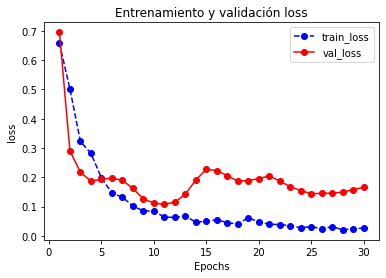

In [29]:
plot_metric(history, 'loss')

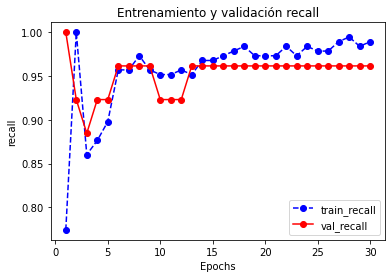

In [30]:
plot_metric(history, 'recall')

**Predicciones**

In [31]:
# Predicting the Test set results
y_pred_val = model.predict(val_features)
y_pred_val[y_pred_val > 0.5] = 1
y_pred_val[y_pred_val <=0.5] = 0
y_pred_val.reshape((y_pred_val.shape[0]))
# predict the training set
y_pred_train = model.predict(train_features)
y_pred_train[y_pred_train > 0.5] = 1
y_pred_train[y_pred_train <=0.5] = 0
y_pred_train.reshape((y_pred_train.shape[0]))


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
       0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0.,
       1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
       0., 0., 1., 0., 0.

**Cálculo de métricas**

In [32]:
# Elimina dimensiones sobrantes
val_targets = np.squeeze(val_targets)
y_pred_val = np.squeeze(y_pred_val)
train_targets = np.squeeze(train_targets)
y_pred_train = np.squeeze(y_pred_train)

# Falsos negativos validación
fn_val = FalseNegatives()
fn_val.update_state(val_targets, y_pred_val)
fn_val = fn_val.result().numpy()
#
# Falsos negativos entrenamiento
fn_train = FalseNegatives()
fn_train.update_state(train_targets, y_pred_train)
fn_train = fn_train.result().numpy()
# 
# Falsos positivos validación
fp_val = FalsePositives()
fp_val.update_state(val_targets, y_pred_val)
fp_val = fp_val.result().numpy()
#
# Falsos positivos entrenamiento
fp_train = FalsePositives()
fp_train.update_state(train_targets, y_pred_train)
fp_train = fp_train.result().numpy()
# 
# Precision validación
pre_val = Precision()
pre_val.update_state(val_targets, y_pred_val)
pre_val = pre_val.result().numpy()
#
# Falsos negativos entrenamiento
pre_train = Precision()
pre_train.update_state(train_targets, y_pred_train)
pre_train = pre_train.result().numpy()
# 
# Recall validación
re_val = Recall()
re_val.update_state(val_targets, y_pred_val)
re_val = re_val.result().numpy()
#
# Recall entrenamiento
re_train = Recall()
re_train.update_state(train_targets, y_pred_train)
re_train = re_train.result().numpy()
# 

# Diccionario
metricas = {'Falsos_positivos_train':fp_train, 'Falsos_positivos_val':fp_val,
           '%Falsos_positivos': np.round((fp_train+fp_val)/ len(training)*100,4),
           'Falsos_negativos_train':fn_train, 'Falsos_negativos_val':fn_val,
           '%Falsos_negativos': np.round((fn_train+fn_val)/ len(training)*100,4),
           'Precision_train': pre_train, 'Precision_val': pre_val,
           'Recall_train': re_train, 'Recall_val':re_val }

In [33]:
metricas

{'Falsos_positivos_train': 1.0,
 'Falsos_positivos_val': 6.0,
 '%Falsos_positivos': 1.2302,
 'Falsos_negativos_train': 1.0,
 'Falsos_negativos_val': 1.0,
 '%Falsos_negativos': 0.3515,
 'Precision_train': 0.99462366,
 'Precision_val': 0.8064516,
 'Recall_train': 0.99462366,
 'Recall_val': 0.96153843}

<a class="anchor" id="Red_neuronal_de_regresión_para_predecir_el_precio_de_las_viviendas_en_Boston"></a>

<center>
    
 ### <font center color="purple">Red neuronal de regresión para predecir el precio de las viviendas en Boston</font>
    
    


**Sobre el conjunto de datos**

El conjunto de datos de vivienda de Boston se deriva de la información recopilada por el Servicio del Censo de los EE.UU. Sobre la vivienda en el área de Boston MA.

Este conjunto de datos tiene 14 columnas, cada una de las cuales define un parámetro.

* CRIM: tasa de delincuencia per cápita por ciudad.
* ZN: proporción de terreno residencial dividido en zonas para lotes de más de 25,000 pies cuadrados.
* INDUS: proporción de acres comerciales no minoristas por ciudad.
* CHAS: Variable ficticia de Charles River (1 si el tramo limita con el río; 0 en caso contrario).
* NOX: concentración de óxidos nítricos (partes por 10 millones).
* RM: número medio de habitaciones por vivienda.
* EDAD: proporción de unidades ocupadas por el propietario construidas antes de 1940.
* DIS: distancias ponderadas a cinco centros de empleo de Boston.
* RAD: índice de accesibilidad a carreteras radiales.
* IMPUESTO: tasa de impuesto a la propiedad de valor total por 10,000.
* PTRATIO: Proporción alumno-profesor por ciudad.
* B: $1000(Bk - 0.63)^2$ donde Bk es la proporción de negros por ciudad.
* LSTAT: % menor estado de la población.
* MEDV: valor medio de las viviendas ocupadas por sus propietarios en $ 1000.

In [34]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline


#Importar librerías 
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model



print(tf.__version__)

2.4.1


In [36]:
from sklearn.datasets import load_boston
boston = load_boston()

# Create a dataframe
data = pd.DataFrame(boston.data)

In [37]:
data.head(10) #Visualización de la bases de datos

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [38]:
# Nombramos variables
data.columns = boston.feature_names
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [39]:
#También necesitamos una variable de precio en el marco de datos
data['PRICE'] = boston.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


La variable de precio no aparece en los datos inicialmente porque no es un parámetro

In [40]:
data.shape

(506, 14)

In [41]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [43]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

In [44]:
data.isnull().sum() #Comprobamos si faltan valores

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [45]:
data = data.dropna()

In [45]:
corr = data.corr() #Correlación entre las variables
corr.shape

(14, 14)

<AxesSubplot:>

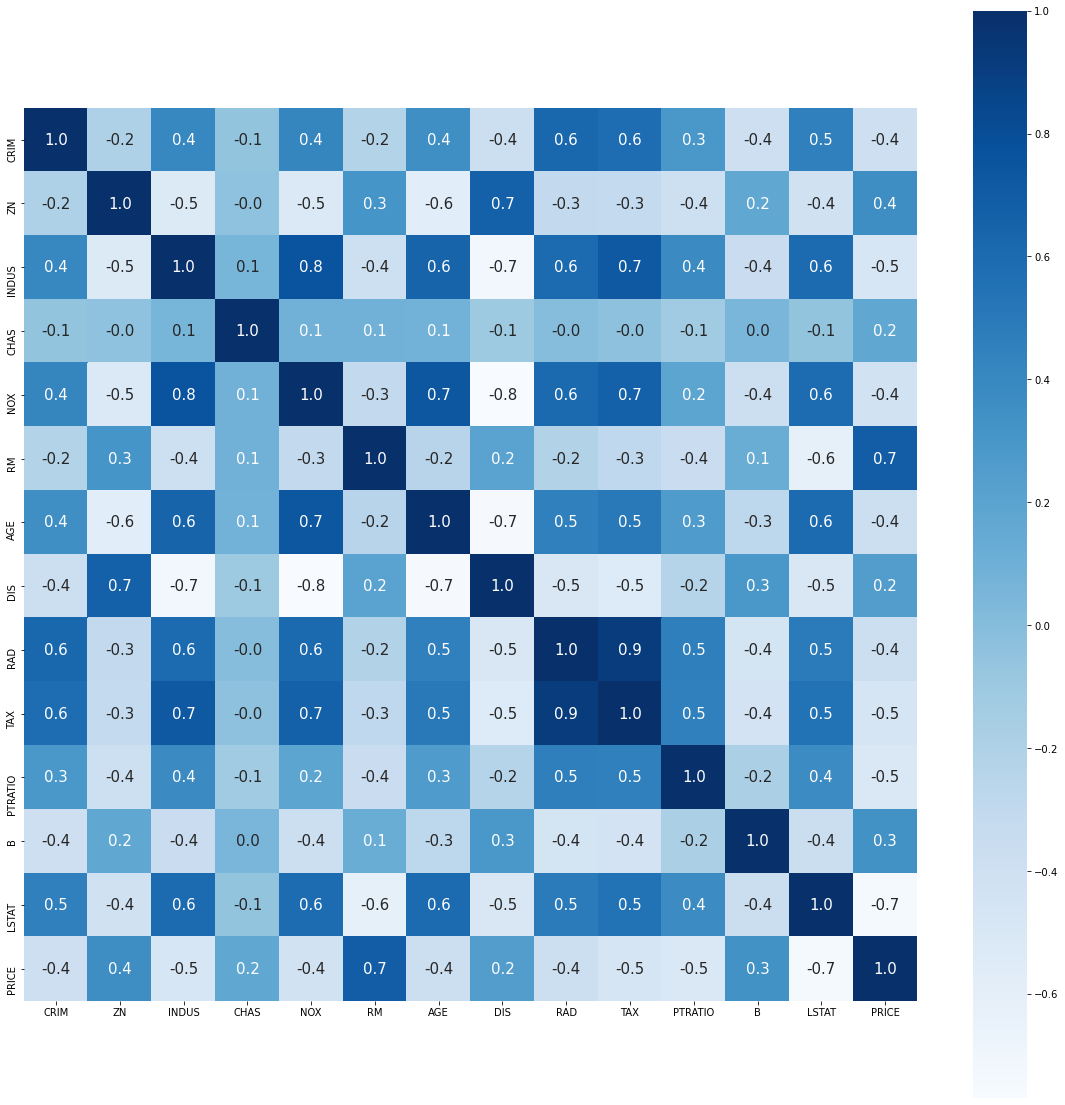

In [46]:
#Trazar el mapa de calor de correlación entre características
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Blues')

### Dividir los datos en entrenamiento y test

In [49]:
train_data = data.sample(frac=0.8,random_state=0)  #80% de los datos para train
test_data = data.drop(train_dataset.index) 

In [50]:
train_data.keys()

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

**Análisis descriptivo**

In [54]:
train_stats = train_data.describe()
train_stats.pop("PRICE")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
CRIM,405.0,3.670339,8.977954,0.00632,0.08265,0.26838,3.47428,88.9762
ZN,405.0,11.067901,22.688396,0.00000,0.00000,0.00000,12.50000,95.0000
INDUS,405.0,11.097951,6.699157,0.74000,5.32000,9.69000,18.10000,27.7400
CHAS,405.0,0.069136,0.253999,0.00000,0.00000,0.00000,0.00000,1.0000
NOX,405.0,0.553098,0.115564,0.38500,0.44900,0.53800,0.62400,0.8710
RM,405.0,6.269768,0.690552,3.56100,5.87800,6.19300,6.61900,8.7800
AGE,405.0,68.241975,27.908527,2.90000,45.00000,76.50000,94.10000,100.0000
DIS,405.0,3.834098,2.162173,1.12960,2.07880,3.27210,5.21460,12.1265
RAD,405.0,9.474074,8.618564,1.00000,4.00000,5.00000,24.00000,24.0000
TAX,405.0,405.839506,164.057951,187.00000,284.00000,334.00000,666.00000,711.0000


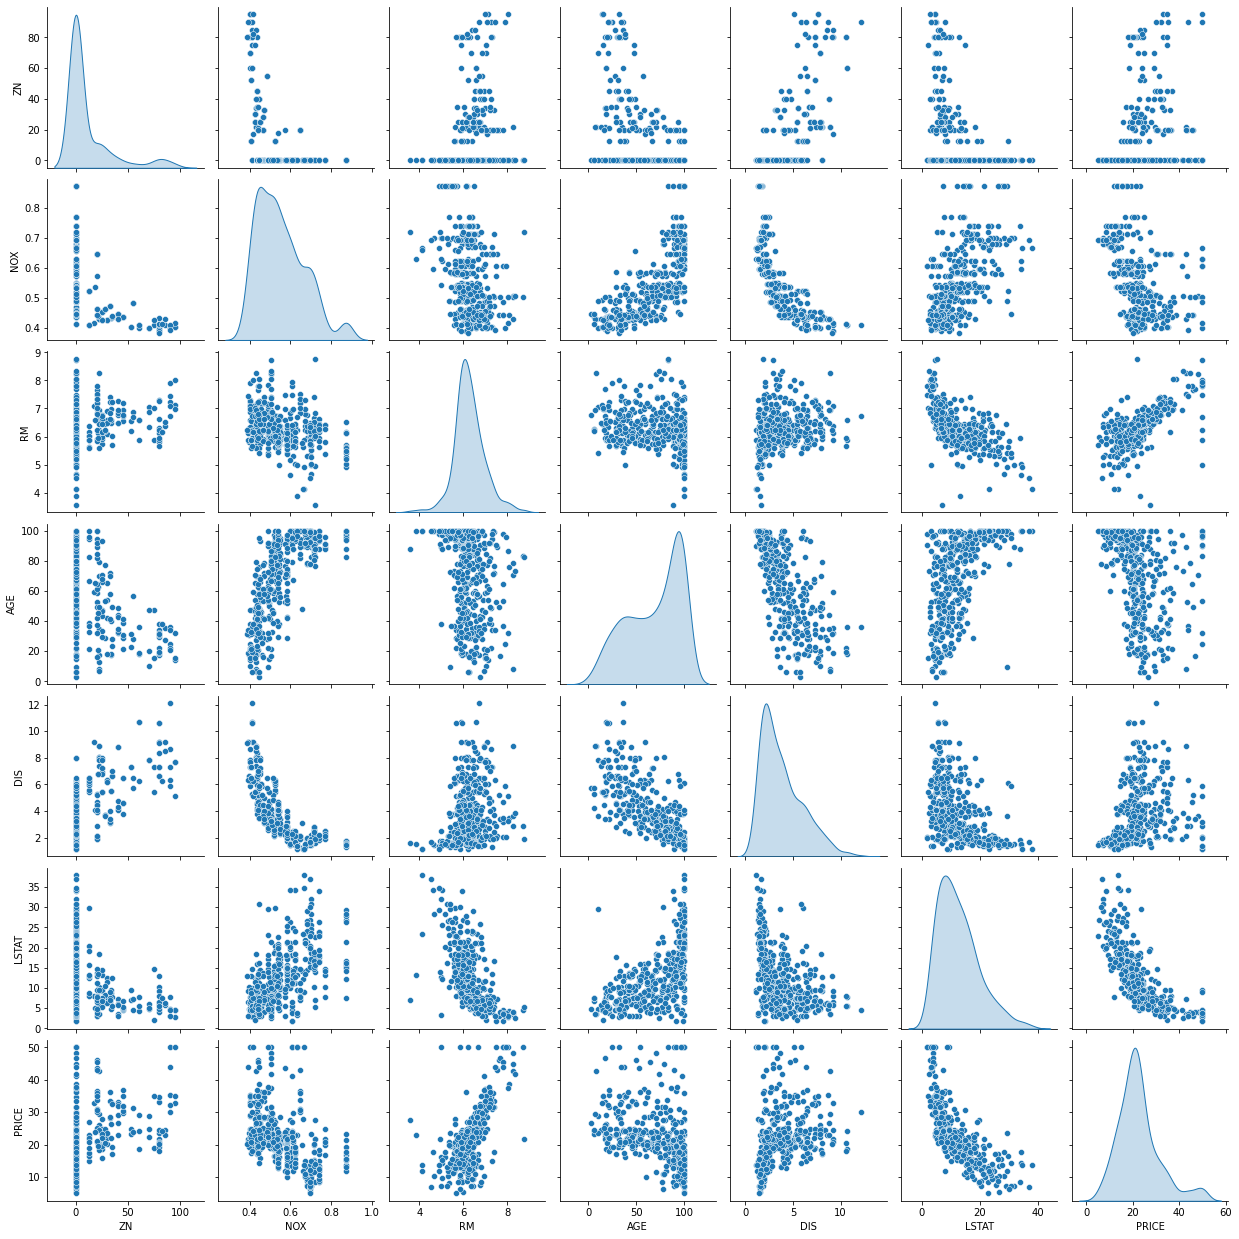

In [55]:
sns.pairplot(train_dataset[["ZN", "NOX", "RM", "AGE", "DIS", "LSTAT", "PRICE"]], diag_kind="kde")

### Separar características y etiquetas

In [56]:
train_labels = train_data.pop('PRICE')
test_labels = test_data.pop('PRICE')

In [57]:
print(train_data)

         CRIM    ZN  INDUS  CHAS     NOX     RM    AGE     DIS   RAD    TAX  \
329   0.06724   0.0   3.24   0.0  0.4600  6.333   17.2  5.2146   4.0  430.0   
371   9.23230   0.0  18.10   0.0  0.6310  6.216  100.0  1.1691  24.0  666.0   
219   0.11425   0.0  13.89   1.0  0.5500  6.373   92.4  3.3633   5.0  276.0   
403  24.80170   0.0  18.10   0.0  0.6930  5.349   96.0  1.7028  24.0  666.0   
78    0.05646   0.0  12.83   0.0  0.4370  6.232   53.7  5.0141   5.0  398.0   
..        ...   ...    ...   ...     ...    ...    ...     ...   ...    ...   
279   0.21038  20.0   3.33   0.0  0.4429  6.812   32.2  4.1007   5.0  216.0   
227   0.41238   0.0   6.20   0.0  0.5040  7.163   79.9  3.2157   8.0  307.0   
148   2.33099   0.0  19.58   0.0  0.8710  5.186   93.8  1.5296   5.0  403.0   
143   4.09740   0.0  19.58   0.0  0.8710  5.468  100.0  1.4118   5.0  403.0   
334   0.03738   0.0   5.19   0.0  0.5150  6.310   38.5  6.4584   5.0  224.0   

     PTRATIO       B  LSTAT  
329     16.9  375.21 

### Normalizar datos

In [58]:
def norm(x):  #ponerle el mismo peso a las variables para que no sea sesgado
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_data)
normed_test_data = norm(test_data)

In [59]:
print(normed_train_data)

         CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
329 -0.401327 -0.487822 -1.172976 -0.272190 -0.805595  0.091567 -1.828903   
371  0.619513 -0.487822  1.045214 -0.272190  0.674104 -0.077862  1.137933   
219 -0.396091 -0.487822  0.416776  3.664838 -0.026806  0.149492  0.865614   
403  2.353694 -0.487822  1.045214 -0.272190  1.210603 -1.333380  0.994607   
78  -0.402528 -0.487822  0.258547 -0.272190 -1.004618 -0.054692 -0.521059   
..        ...       ...       ...       ...       ...       ...       ...   
279 -0.385384  0.393686 -1.159542 -0.272190 -0.953564  0.785216 -1.291432   
227 -0.362884 -0.487822 -0.731129 -0.272190 -0.424853  1.293505  0.417723   
148 -0.149182 -0.487822  1.266137 -0.272190  2.750874 -1.569423  0.915778   
143  0.047568 -0.487822  1.266137 -0.272190  2.750874 -1.161054  1.137933   
334 -0.404653 -0.487822 -0.881895 -0.272190 -0.329668  0.058261 -1.065695   

          DIS       RAD       TAX   PTRATIO         B     LSTAT  
329  0.63

### Modelo secuencial

In [60]:
model = keras.Sequential([  #construimos un objeto de la clase sequential, el espera una lista de capas
layers.Dense(64, activation='relu', input_shape=(normed_train_data.shape[1],)), #le decimos cuantos datos van a entrar(8), salen 64 aunque uno arranca normalmente un poco arriba (16) de las que estan entrando 
layers.Dense(64, activation='relu'),  #como primer experimento esta capa no deberia ir
layers.Dense(1)
])

In [61]:
optimizer = tf.keras.optimizers.RMSprop(0.001)
model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])

**Resumen**

In [62]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


### Entrenamiento

In [63]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

epochs = 200

history = model.fit(
  normed_train_data, train_labels,
  epochs=epochs, validation_split = 0.2, verbose=0,  
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................

In [64]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
195,4.411123,1.435586,4.411123,17.194275,2.887285,17.194275,195
196,4.643270,1.493039,4.643270,17.445137,2.836111,17.445137,196
197,4.531307,1.481013,4.531307,15.156211,2.622496,15.156211,197
198,4.507619,1.424799,4.507619,17.791056,2.949570,17.791056,198
199,4.639660,1.463941,4.639660,17.325493,2.887023,17.325493,199


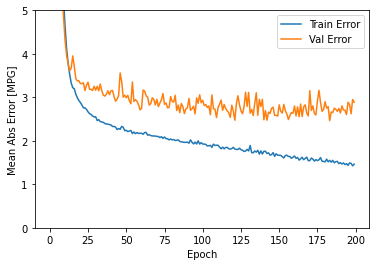

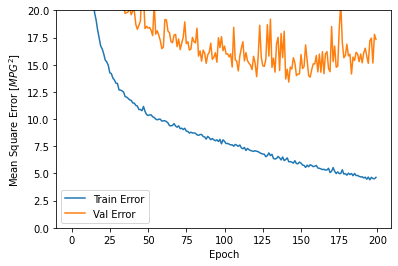

In [65]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(history)

El modelo está empeorando el error de validación luego de 100 epocas, usamos entonces detención temprana.
### Detención temprana


............

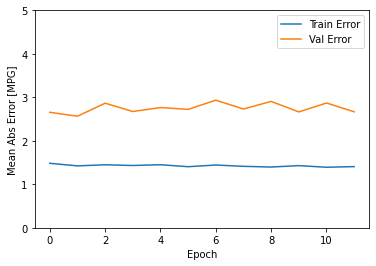

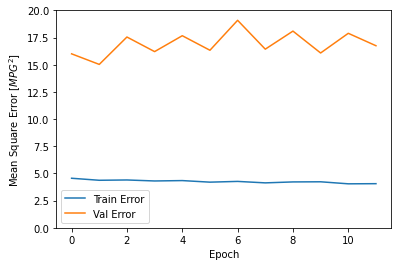

In [66]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=epochs,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [67]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} PRICE".format(mae))

4/4 - 0s - loss: 5.7022 - mae: 1.8061 - mse: 5.7022
Testing set Mean Abs Error:  1.81 PRICE


### Predicción

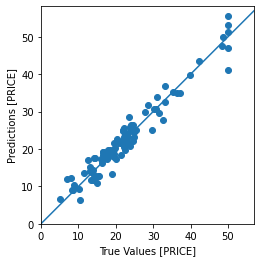

In [69]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [PRICE]')
plt.ylabel('Predictions [PRICE]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])


Parece que la predicción es buena, aunque hay algunos valores atípicos.

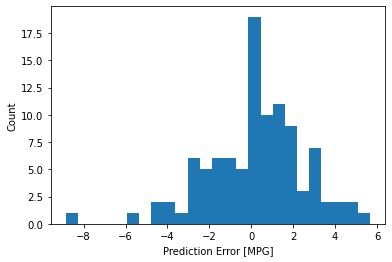

In [71]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

Los errores presentan una distribución gaussiana. 